# Sinusoidal Function Approximation

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

## Problem Definition

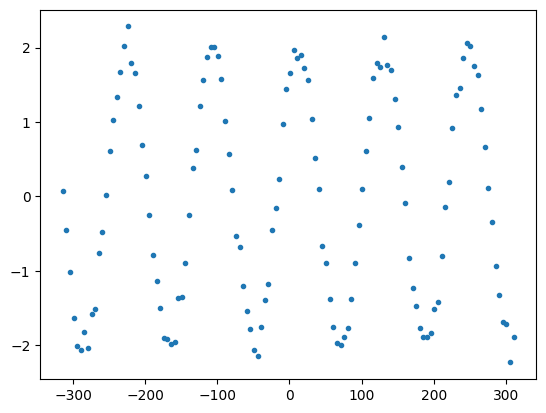

In [2]:
df = pandas.read_csv('../Evolutionary Programming/datos.csv')
X = df['x'].values
Y = df['y'].values
plt.figure()
plt.plot(X, Y, '.')
plt.show()

In [3]:
def objective_function(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    return np.sum(np.abs(Y - Yp))
def draw_solution(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    plt.figure()
    plt.plot(X, Y, '.')
    plt.plot(X, Yp)
    plt.show()

bounds = [
    [-100, 100],
    [-100, 100],
    [-100, 100]
]

## Our differential evolution

In [4]:
from differential_evolution import differential_evolution

In [5]:
r = differential_evolution(objective_function, bounds, 500, 0.45, 500, (X, Y))
r

{'P': array([-1.96842497e+00, -5.31143318e+04, -9.78706180e+05]),
 'nIt': 500,
 'fun': 10.950327353305081,
 'nFev': 250500}

10.950327353305081


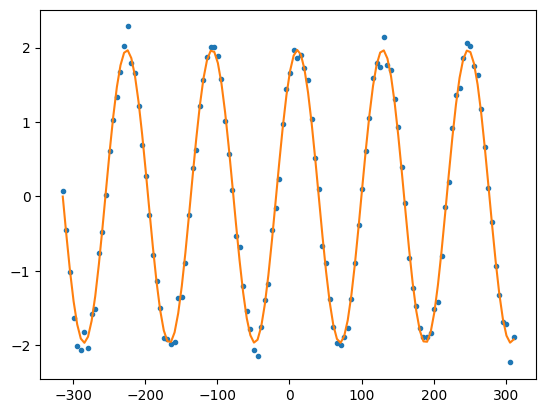

In [6]:
P = r['P']
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

## Scipy differential evolution

In [7]:
from scipy.optimize import differential_evolution

In [8]:
res = differential_evolution(objective_function, bounds, args = (X, Y))
res

     fun: 10.65315408596476
     jac: array([ 2.60211747, 23.0962462 ,  2.84869651])
 message: 'Optimization terminated successfully.'
    nfev: 10016
     nit: 219
 success: True
       x: array([  1.99390125, -49.06197858,  51.80634584])

10.65315408596476


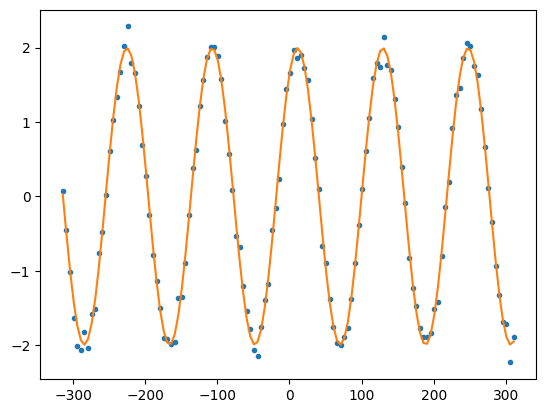

In [9]:
P = res.x
print(objective_function(P, X, Y))
draw_solution(P, X, Y)